# 1. Loading the library

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
mobile=pd.read_csv(r"E:\vinod sir complete data\vinod sir notes\Machine Learning\Naive Bayes classifier\mobile price\mobile_price.csv")
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
mobile.shape

(2000, 21)

In [4]:
mobile.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<AxesSubplot:>

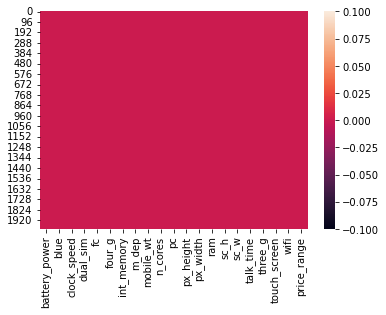

In [6]:
sns.heatmap(mobile.isnull())

In [8]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# EDA

# Target variable  price_range

In [10]:
mobile.price_range.isnull().sum()

0

In [11]:
mobile.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Text(0.5, 1.0, 'countplot of price_range')

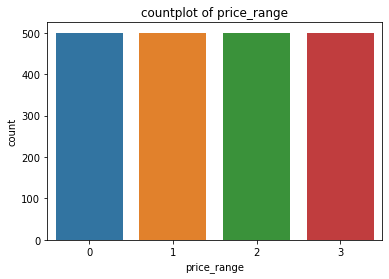

In [12]:
sns.countplot(mobile.price_range)
plt.title('countplot of price_range')

In [13]:
mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# 1. battery_power

In [14]:
mobile.battery_power.value_counts()

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

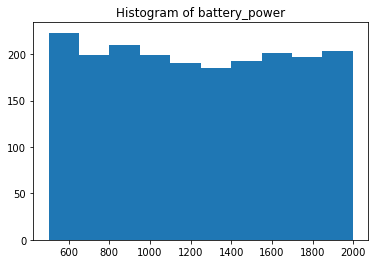

In [16]:
plt.hist(mobile.battery_power)
plt.title('Histogram of battery_power')
plt.show()

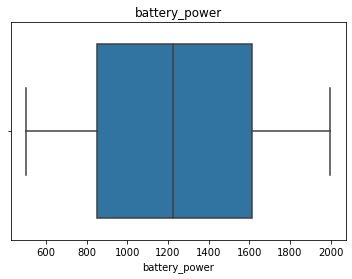

In [18]:
sns.boxplot(mobile.battery_power)
plt.title('battery_power')
plt.show()

In [28]:
mobile.battery_power.groupby(mobile.price_range).describe()

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
0,500.0,1116.902,410.801305,503.0,770.50,1066.0,1431.25,1994.0
1,500.0,1228.868,438.614528,501.0,843.00,1206.0,1596.25,1996.0
2,500.0,1228.320,452.863065,501.0,816.50,1219.5,1635.75,1998.0
3,500.0,1379.984,414.992261,503.0,1034.75,1449.5,1733.50,1994.0


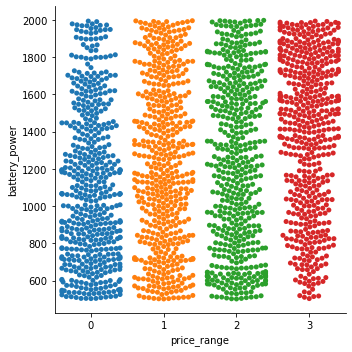

In [29]:
sns.catplot(x='price_range',y='battery_power',kind='swarm',data=mobile)

Text(0.5, 1.0, 'Battery_power vs price_range')

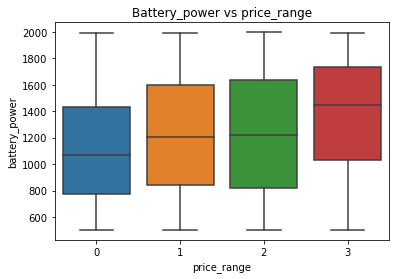

In [30]:
sns.boxplot(x='price_range',y='battery_power',data=mobile)
plt.title('Battery_power vs price_range')

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod_battery_power=ols('price_range ~ battery_power',data=mobile).fit()
anova_table_battery=sm.stats.anova_lm(mod_battery_power,type=2)
print(anova_table_battery)

                   df       sum_sq     mean_sq          F        PR(>F)
battery_power     1.0   100.723918  100.723918  83.877962  1.264854e-19
Residual       1998.0  2399.276082    1.200839        NaN           NaN


In [25]:
rslt=pairwise_tukeyhsd(mobile.battery_power,mobile.price_range,alpha=0.05)
print(rslt)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1  111.966 0.001  42.0953 181.8367   True
     0      2  111.418 0.001  41.5473 181.2887   True
     0      3  263.082 0.001 193.2113 332.9527   True
     1      2   -0.548   0.9 -70.4187  69.3227  False
     1      3  151.116 0.001  81.2453 220.9867   True
     2      3  151.664 0.001  81.7933 221.5347   True
-----------------------------------------------------


In [31]:
mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# battery_power is a good predictor  where p-value =1.26e-19

# 2. blue

In [32]:
mobile.blue.value_counts()

0    1010
1     990
Name: blue, dtype: int64

Text(0.5, 1.0, 'count of blue')

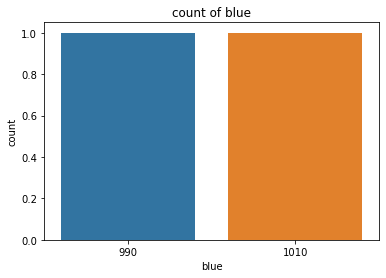

In [34]:
sns.countplot(mobile.blue.value_counts())
plt.title('count of blue')

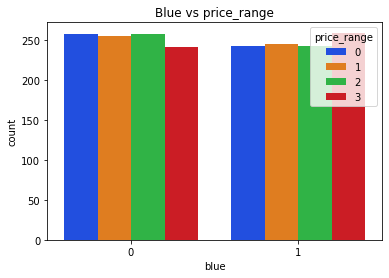

In [37]:
sns.countplot(mobile.blue,hue=mobile.price_range,palette='bright')
plt.title('Blue vs price_range')
plt.show()

In [39]:
from scipy.stats import chi2,chi2_contingency

ct_blue=pd.crosstab(mobile.blue,mobile.price_range)
ct_blue

price_range,0,1,2,3
blue,,,,
0,257,255,257,241
1,243,245,243,259


In [40]:
chi2_contingency(ct_blue,correction=False)

(1.432143214321432,
 0.6980177809451273,
 3,
 array([[252.5, 252.5, 252.5, 252.5],
        [247.5, 247.5, 247.5, 247.5]]))

# Blue p-value is 0.698 is not a good predictor

# 3. clock_speed

In [42]:
mobile.clock_speed.value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

Text(0.5, 1.0, 'count plot of clock_speed')

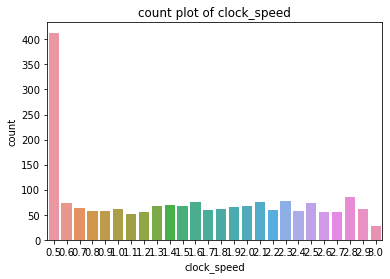

In [43]:
sns.countplot(mobile.clock_speed)
plt.title('count plot of clock_speed')

Text(0.5, 1.0, 'clock_speed')

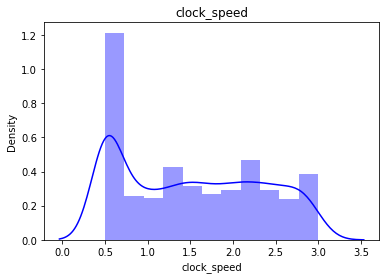

In [45]:
sns.distplot(mobile.clock_speed,color='b')
plt.title('clock_speed')

Text(0.5, 1.0, 'Boxplot of clock_speed')

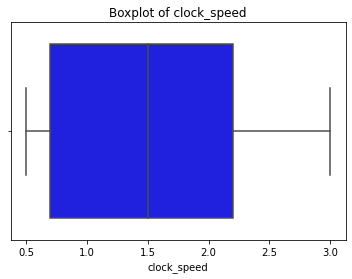

In [46]:
sns.boxplot(mobile.clock_speed,color='b')
plt.title('Boxplot of clock_speed')

Text(0.5, 1.0, 'clock_speed vs price_range')

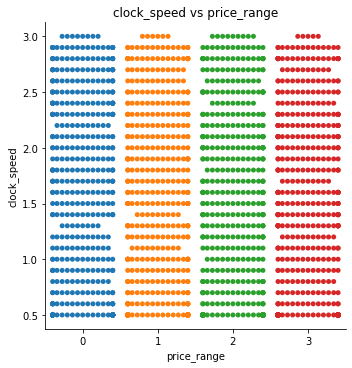

In [47]:
sns.catplot(x='price_range',y='clock_speed',kind='swarm',data=mobile)
plt.title('clock_speed vs price_range')

Text(0.5, 1.0, 'clock_speed vs price_range')

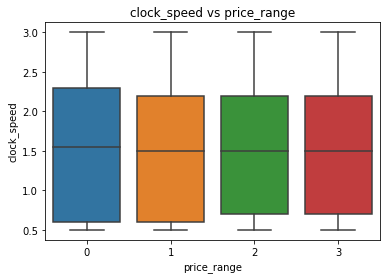

In [48]:
sns.boxplot(x='price_range',y='clock_speed',data=mobile)
plt.title('clock_speed vs price_range')

In [50]:
mod_clock_speed=ols('clock_speed ~ price_range',data=mobile).fit()
sm.stats.anova_lm(mod_clock_speed)

,df,sum_sq,mean_sq,F,PR(>F)
price_range,1.0,0.058081,0.058081,0.087187,0.767815
Residual,1998.0,1331.001794,0.666167,NaN,NaN


In [54]:
result=pairwise_tukeyhsd(mobile.clock_speed,mobile.price_range,alpha=0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0616 0.6155 -0.1943 0.0711  False
     0      2  -0.0204    0.9 -0.1531 0.1123  False
     0      3  -0.0298    0.9 -0.1625 0.1029  False
     1      2   0.0412 0.8373 -0.0915 0.1739  False
     1      3   0.0318    0.9 -0.1009 0.1645  False
     2      3  -0.0094    0.9 -0.1421 0.1233  False
---------------------------------------------------


# clock_speed p-value=0.767 is greater than 0.05 so it's not a good predictor

# 4. dual_sim

In [56]:
mobile.dual_sim.value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [57]:
mobile.dual_sim.value_counts().sum()

2000

Text(0.5, 1.0, 'countplot of dual_sim')

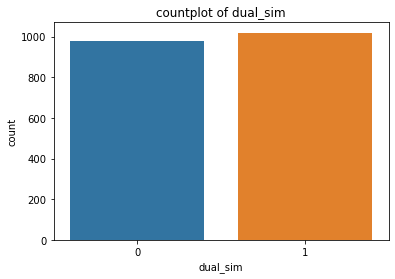

In [58]:
sns.countplot(mobile.dual_sim)
plt.title('countplot of dual_sim')

Text(0.5, 1.0, 'dual_sim vs price_range')

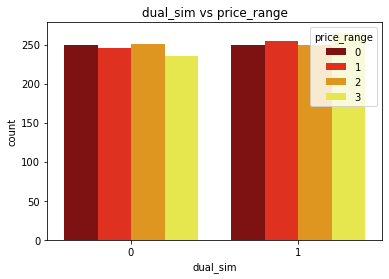

In [59]:
sns.countplot(mobile.dual_sim,hue=mobile.price_range,palette='hot')
plt.title('dual_sim vs price_range')

In [60]:
ct_dual_sim=pd.crosstab(mobile.dual_sim,mobile.price_range)
ct_dual_sim

price_range,0,1,2,3
dual_sim,,,,
0,250,245,251,235
1,250,255,249,265


In [61]:
chi2_contingency(ct_dual_sim,correction=False)

(1.286464413653329,
 0.7323497176264594,
 3,
 array([[245.25, 245.25, 245.25, 245.25],
        [254.75, 254.75, 254.75, 254.75]]))

# dual_sim p-value is 0.73 is greater than 0.05 so its not a good predictor

In [62]:
mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# 5. fc

In [64]:
mobile.fc.value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

<AxesSubplot:xlabel='fc', ylabel='Density'>

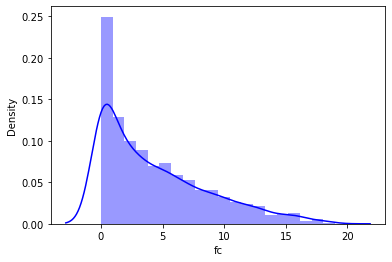

In [65]:
sns.distplot(mobile.fc,color='blue')

Text(0.5, 1.0, 'Boxplot of fc')

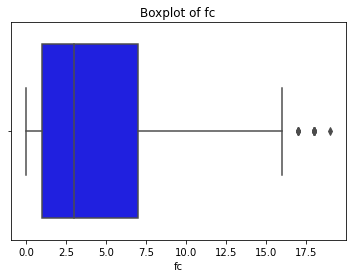

In [66]:
sns.boxplot(mobile.fc,color='blue')
plt.title('Boxplot of fc')

Text(0.5, 1.0, 'fc vs price_range')

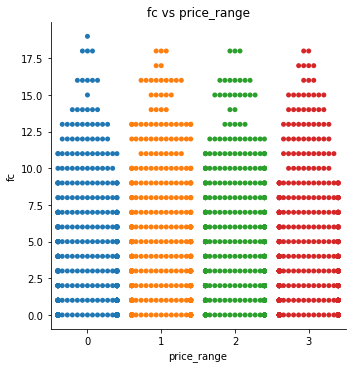

In [67]:
sns.catplot(x='price_range',y='fc',kind='swarm',data=mobile)
plt.title('fc vs price_range')

Text(0.5, 1.0, 'fc vs price_range')

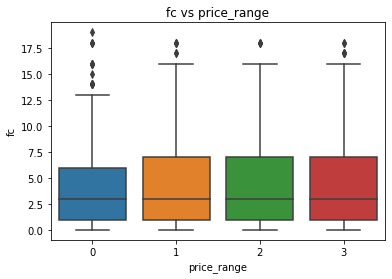

In [68]:
sns.boxplot(x='price_range',y='fc',data=mobile)
plt.title('fc vs price_range')

In [69]:
mobile.fc.groupby(mobile.price_range).describe()

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
0,500.0,4.084,4.183772,0.0,1.0,3.0,6.0,19.0
1,500.0,4.340,4.499432,0.0,1.0,3.0,7.0,18.0
2,500.0,4.498,4.347390,0.0,1.0,3.0,7.0,18.0
3,500.0,4.316,4.332399,0.0,1.0,3.0,7.0,18.0


In [70]:
mobile.fc.groupby(mobile.price_range).mean()

price_range
0    4.084
1    4.340
2    4.498
3    4.316
Name: fc, dtype: float64

In [71]:
mod_fc=ols('fc ~ price_range',data=mobile).fit()

In [72]:
sm.stats.anova_lm(mod_fc)

,df,sum_sq,mean_sq,F,PR(>F)
price_range,1.0,18.2329,18.232900,0.967343,0.325463
Residual,1998.0,37659.1866,18.848442,NaN,NaN


In [73]:
rslt=pairwise_tukeyhsd(mobile.fc,mobile.price_range,alpha=0.05)
print(rslt)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1    0.256  0.762 -0.4501 0.9621  False
     0      2    0.414 0.4346 -0.2921 1.1201  False
     0      3    0.232  0.811 -0.4741 0.9381  False
     1      2    0.158    0.9 -0.5481 0.8641  False
     1      3   -0.024    0.9 -0.7301 0.6821  False
     2      3   -0.182    0.9 -0.8881 0.5241  False
---------------------------------------------------


# fc p-value>0.05 so its a bad predictor

In [74]:
mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# 6. four_g

In [76]:
mobile.four_g.value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [77]:
mobile.four_g.value_counts().sum()

2000

Text(0.5, 1.0, 'countplot of four_g')

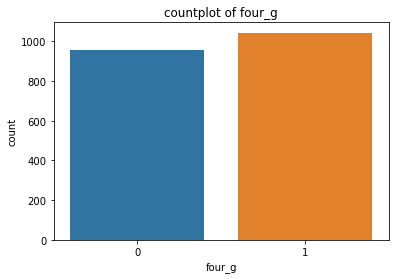

In [78]:
sns.countplot(mobile.four_g)
plt.title('countplot of four_g')

Text(0.5, 1.0, 'four_g vs price_range')

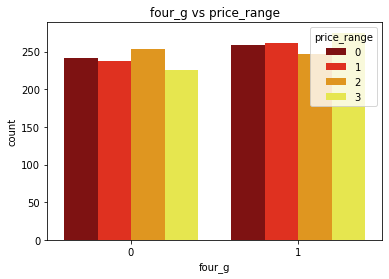

In [79]:
sns.countplot(mobile.four_g,hue=mobile.price_range,palette='hot')
plt.title('four_g vs price_range')

In [80]:
ct_four_g=pd.crosstab(mobile.four_g,mobile.price_range)
ct_four_g

price_range,0,1,2,3
four_g,,,,
0,241,238,253,225
1,259,262,247,275


In [81]:
chi2_contingency(ct_four_g,correction=False)

(3.179879597375548,
 0.36471408196943356,
 3,
 array([[239.25, 239.25, 239.25, 239.25],
        [260.75, 260.75, 260.75, 260.75]]))

# four_g p-value=0.364 is greater than 0.05 so its not a good predictor

# 7. int_memory

In [83]:
mobile.int_memory.value_counts()

27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

<AxesSubplot:xlabel='int_memory', ylabel='Density'>

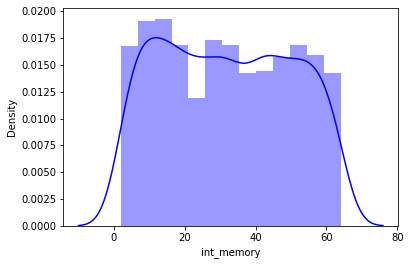

In [85]:
sns.distplot(mobile.int_memory,color='blue')

Text(0.5, 1.0, 'Boxplot of int_memory')

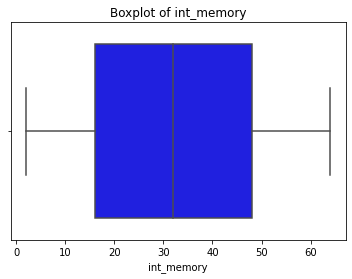

In [87]:
sns.boxplot(mobile.int_memory,color='blue')
plt.title('Boxplot of int_memory')

Text(0.5, 1.0, 'int_memory vs price_range')

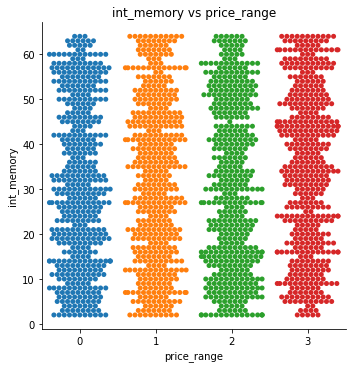

In [88]:
sns.catplot(x='price_range',y='int_memory',kind='swarm',data=mobile)
plt.title('int_memory vs price_range')

Text(0.5, 1.0, 'int_memory vs price_range')

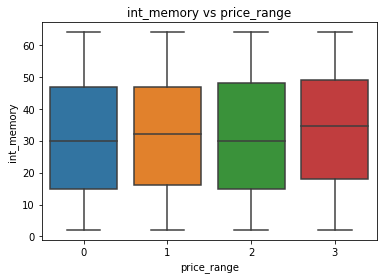

In [89]:
sns.boxplot(x='price_range',y='int_memory',data=mobile)
plt.title('int_memory vs price_range')

In [90]:
mobile.int_memory.groupby(mobile.price_range).describe()

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
0,500.0,31.174,18.101023,2.0,15.0,30.0,47.0,64.0
1,500.0,32.116,18.000739,2.0,16.0,32.0,47.0,64.0
2,500.0,30.920,18.441958,2.0,15.0,30.0,48.0,64.0
3,500.0,33.976,17.930377,2.0,18.0,34.5,49.0,64.0


In [91]:
mobile.int_memory.groupby(mobile.price_range).mean()

price_range
0    31.174
1    32.116
2    30.920
3    33.976
Name: int_memory, dtype: float64

In [92]:
mod_int_memory=ols('int_memory ~ price_range',data=mobile).fit()

In [93]:
sm.stats.anova_lm(mod_int_memory)

,df,sum_sq,mean_sq,F,PR(>F)
price_range,1.0,1299.6025,1299.602500,3.952787,0.04693
Residual,1998.0,656905.0730,328.781318,NaN,NaN


In [94]:
rslt=pairwise_tukeyhsd(mobile.int_memory,mobile.price_range,alpha=0.05)
print(rslt)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1    0.942 0.8238 -2.0046 3.8886  False
     0      2   -0.254    0.9 -3.2006 2.6926  False
     0      3    2.802 0.0693 -0.1446 5.7486  False
     1      2   -1.196 0.6994 -4.1426 1.7506  False
     1      3     1.86 0.3665 -1.0866 4.8066  False
     2      3    3.056 0.0387  0.1094 6.0026   True
---------------------------------------------------


# int_memory p-valeu is <0.05 so its a good predictor

# 8. m_dep

In [96]:
mobile.m_dep.value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

<AxesSubplot:xlabel='m_dep', ylabel='Density'>

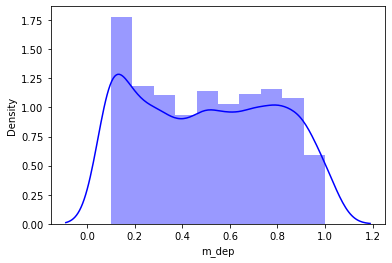

In [97]:
sns.distplot(mobile.m_dep,color='blue')

Text(0.5, 1.0, 'Boxplot of m_dep')

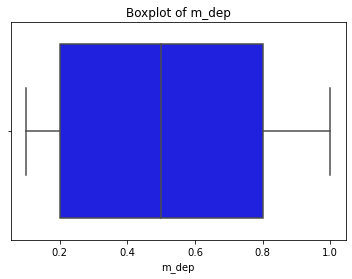

In [98]:
sns.boxplot(mobile.m_dep,color='blue')
plt.title('Boxplot of m_dep')

Text(0.5, 1.0, 'm_dep vs price_range')

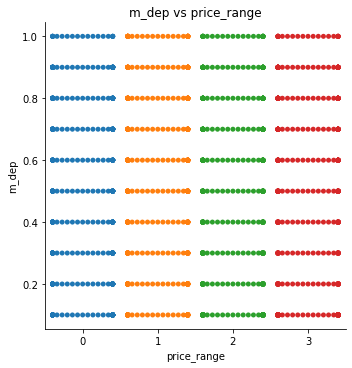

In [99]:
sns.catplot(x='price_range',y='m_dep',kind='swarm',data=mobile)
plt.title('m_dep vs price_range')

Text(0.5, 1.0, 'm_dep vs price_range')

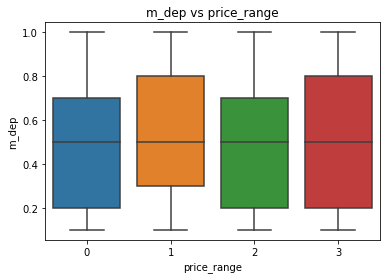

In [100]:
sns.boxplot(x='price_range',y='m_dep',data=mobile)
plt.title('m_dep vs price_range')

In [101]:
mobile.m_dep.groupby(mobile.price_range).describe()

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
0,500.0,0.4902,0.288184,0.1,0.2,0.5,0.7,1.0
1,500.0,0.5240,0.286895,0.1,0.3,0.5,0.8,1.0
2,500.0,0.4908,0.286215,0.1,0.2,0.5,0.7,1.0
3,500.0,0.5020,0.291901,0.1,0.2,0.5,0.8,1.0


In [102]:
mobile.m_dep.groupby(mobile.price_range).mean()

price_range
0    0.4902
1    0.5240
2    0.4908
3    0.5020
Name: m_dep, dtype: float64

In [104]:
mod_m_dep=ols('m_dep ~ price_range',data=mobile).fit()

In [105]:
sm.stats.anova_lm(mod_m_dep)

,df,sum_sq,mean_sq,F,PR(>F)
price_range,1.0,0.000121,0.000121,0.001454,0.969588
Residual,1998.0,166.283754,0.083225,NaN,NaN


In [106]:
rslt=pairwise_tukeyhsd(mobile.m_dep,mobile.price_range,alpha=0.05)
print(rslt)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0338 0.2487 -0.0131 0.0807  False
     0      2   0.0006    0.9 -0.0463 0.0475  False
     0      3   0.0118    0.9 -0.0351 0.0587  False
     1      2  -0.0332 0.2639 -0.0801 0.0137  False
     1      3   -0.022  0.608 -0.0689 0.0249  False
     2      3   0.0112    0.9 -0.0357 0.0581  False
---------------------------------------------------


# m_dep  p-value =0.96 is >0.05 so its not a good predictor

# 9. mobile_wt

In [108]:
mobile.mobile_wt.value_counts()

182    28
101    27
185    27
146    26
199    26
       ..
116    10
140     9
120     9
149     9
96      9
Name: mobile_wt, Length: 121, dtype: int64

<AxesSubplot:xlabel='mobile_wt', ylabel='Density'>

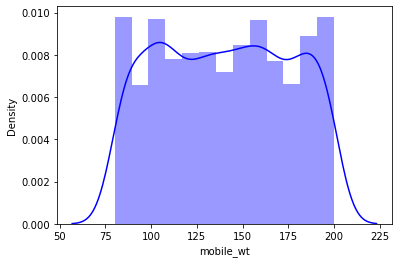

In [109]:
sns.distplot(mobile.mobile_wt,color='blue')

Text(0.5, 1.0, 'Boxplot of mobile_wt')

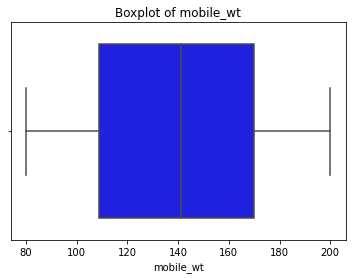

In [110]:
sns.boxplot(mobile.mobile_wt,color='blue')
plt.title('Boxplot of mobile_wt')

Text(0.5, 1.0, 'mobile_wt vs price_range')

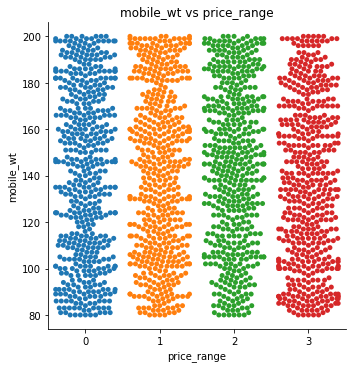

In [111]:
sns.catplot(x='price_range',y='mobile_wt',kind='swarm',data=mobile)
plt.title('mobile_wt vs price_range')

Text(0.5, 1.0, 'mobile_wt vs price_range')

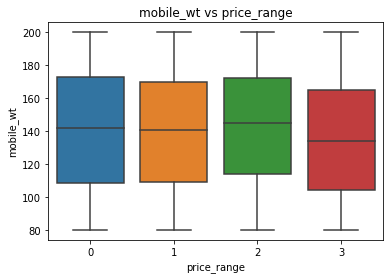

In [112]:
sns.boxplot(x='price_range',y='mobile_wt',data=mobile)
plt.title('mobile_wt vs price_range')

In [113]:
mobile.mobile_wt.groupby(mobile.price_range).describe()

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
0,500.0,140.552,36.378319,80.0,108.75,142.0,173.0,200.0
1,500.0,140.510,35.678956,80.0,109.00,141.0,170.0,200.0
2,500.0,143.614,34.320326,80.0,114.00,145.0,172.0,200.0
3,500.0,136.320,34.911994,80.0,104.00,134.0,165.0,200.0


In [114]:
mobile.mobile_wt.groupby(mobile.price_range).mean()

price_range
0    140.552
1    140.510
2    143.614
3    136.320
Name: mobile_wt, dtype: float64

In [115]:
mod_mobile_wt=ols('mobile_wt ~ price_range',data=mobile).fit()

In [116]:
sm.stats.anova_lm(mod_mobile_wt)

,df,sum_sq,mean_sq,F,PR(>F)
price_range,1.0,2.300162e+03,2300.16160,1.836293,0.175539
Residual,1998.0,2.502718e+06,1252.61153,NaN,NaN


In [117]:
rslt=pairwise_tukeyhsd(mobile.mobile_wt,mobile.price_range,alpha=0.05)
print(rslt)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   -0.042    0.9  -5.7874  5.7034  False
     0      2    3.062 0.5161  -2.6834  8.8074  False
     0      3   -4.232 0.2311  -9.9774  1.5134  False
     1      2    3.104 0.5056  -2.6414  8.8494  False
     1      3    -4.19 0.2391  -9.9354  1.5554  False
     2      3   -7.294 0.0061 -13.0394 -1.5486   True
-----------------------------------------------------


# mobile_wt p-value =0.175 is >0.05 so its not a good predictor

# 10. n_cores

In [119]:
mobile.n_cores.value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

In [120]:
mobile.n_cores.value_counts().sum()

2000

Text(0.5, 1.0, 'countplot of n_cores')

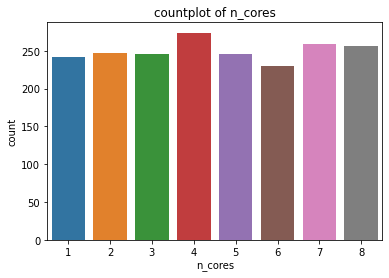

In [121]:
sns.countplot(mobile.n_cores)
plt.title('countplot of n_cores')

Text(0.5, 1.0, 'n_cores vs price_range')

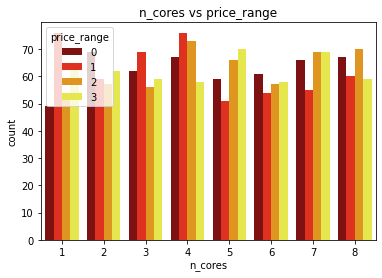

In [122]:
sns.countplot(mobile.n_cores,hue=mobile.price_range,palette='hot')
plt.title('n_cores vs price_range')

In [123]:
ct_n_cores=pd.crosstab(mobile.n_cores,mobile.price_range)
ct_n_cores

price_range,0,1,2,3
n_cores,,,,
1,49,76,52,65
2,69,59,57,62
3,62,69,56,59
4,67,76,73,58
5,59,51,66,70
6,61,54,57,58
7,66,55,69,69
8,67,60,70,59


In [124]:
chi2_contingency(ct_n_cores,correction=False)

(20.524450237054058,
 0.488293911066102,
 21,
 array([[60.5 , 60.5 , 60.5 , 60.5 ],
        [61.75, 61.75, 61.75, 61.75],
        [61.5 , 61.5 , 61.5 , 61.5 ],
        [68.5 , 68.5 , 68.5 , 68.5 ],
        [61.5 , 61.5 , 61.5 , 61.5 ],
        [57.5 , 57.5 , 57.5 , 57.5 ],
        [64.75, 64.75, 64.75, 64.75],
        [64.  , 64.  , 64.  , 64.  ]]))

# n_cores p-value =0.488 is greater than 0.05 so its not a good predictor

In [125]:
mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# 11.pc

In [129]:
mobile.pc.value_counts()

10    122
7     119
9     112
20    110
1     104
14    104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64

Text(0.5, 1.0, 'Countplot of pc')

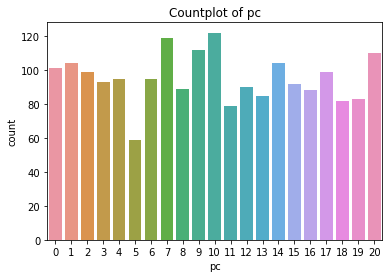

In [130]:
import seaborn as sns
sns.countplot(mobile.pc)
plt.title('Countplot of pc')

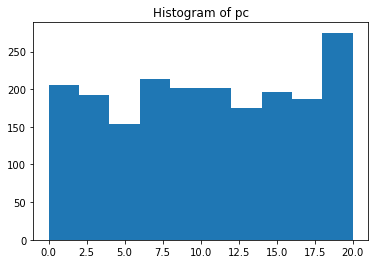

In [131]:
plt.hist(mobile.pc)
plt.title('Histogram of pc')
plt.show()

Text(0.5, 1.0, 'distribution of pc')

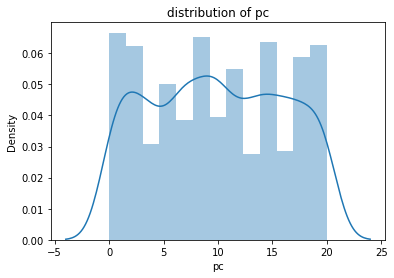

In [133]:
sns.distplot(mobile.pc)
plt.title('distribution of pc')

Text(0.5, 1.0, 'Boxplot of pc')

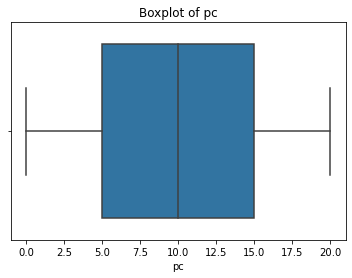

In [135]:
sns.boxplot(mobile.pc)
plt.title('Boxplot of pc')

Text(0.5, 1.0, 'swarm plot of pc vs price_range')

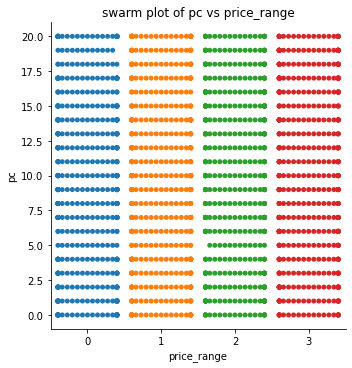

In [137]:
sns.catplot(x='price_range',y='pc',kind='swarm',data=mobile)
plt.title('swarm plot of pc vs price_range')

Text(0.5, 1.0, 'Boxplot of pc')

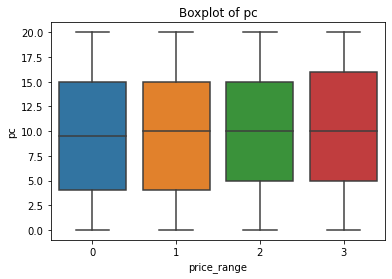

In [138]:
sns.boxplot(x='price_range',y='pc',data=mobile)
plt.title('Boxplot of pc')

Text(0.5, 1.0, 'Boxen plot of pc vs price_range')

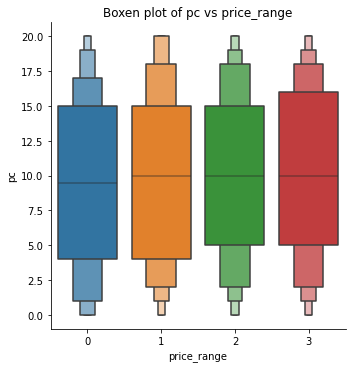

In [139]:
sns.catplot(x='price_range',y='pc',kind='boxen',data=mobile)
plt.title('Boxen plot of pc vs price_range')

In [140]:
mobile.groupby('price_range')['pc'].mean()

price_range
0     9.574
1     9.924
2    10.018
3    10.150
Name: pc, dtype: float64

In [142]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [145]:
mod_pc=ols('pc~price_range',data=mobile).fit()
sm.stats.anova_lm(mod_pc)

,df,sum_sq,mean_sq,F,PR(>F)
price_range,1.0,82.9921,82.992100,2.258117,0.133074
Residual,1998.0,73432.0634,36.752784,NaN,NaN


In [154]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
result=pairwise_tukeyhsd(mobile.pc,mobile.price_range)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1     0.35 0.7731 -0.6363 1.3363  False
     0      2    0.444 0.6355 -0.5423 1.4303  False
     0      3    0.576 0.4382 -0.4103 1.5623  False
     1      2    0.094    0.9 -0.8923 1.0803  False
     1      3    0.226    0.9 -0.7603 1.2123  False
     2      3    0.132    0.9 -0.8543 1.1183  False
---------------------------------------------------


# pc p-value is >0.05 so its not a good predictor

In [155]:
mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# 12. px_height

In [157]:
mobile.px_height.isnull().sum()

0

In [158]:
mobile.px_height.value_counts()

347    7
179    6
371    6
275    6
674    5
      ..
87     1
648    1
341    1
993    1
483    1
Name: px_height, Length: 1137, dtype: int64

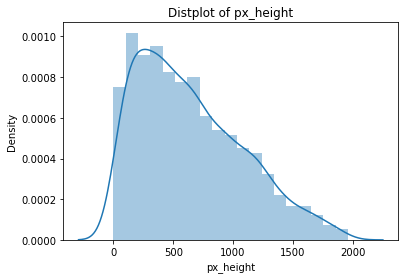

In [160]:
sns.distplot(mobile.px_height)
plt.title('Distplot of px_height')
plt.show()

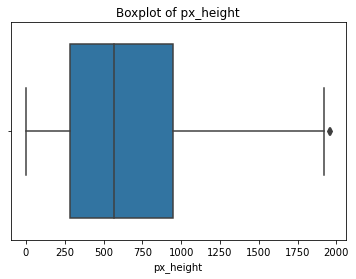

In [162]:
sns.boxplot(mobile.px_height)
plt.title('Boxplot of px_height')
plt.show()

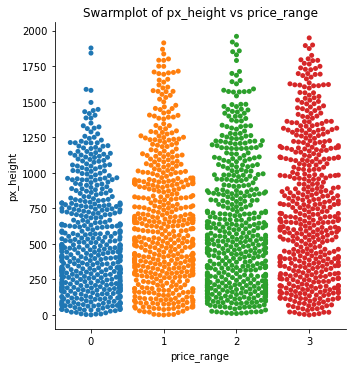

In [163]:
sns.catplot(x='price_range',y='px_height',kind='swarm',data=mobile)
plt.title('Swarmplot of px_height vs price_range')
plt.show()

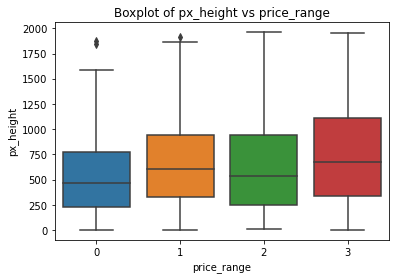

In [164]:
sns.boxplot(x='price_range',y='px_height',data=mobile)
plt.title('Boxplot of px_height vs price_range')
plt.show()

In [167]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_px_height=ols('px_height~price_range',data=mobile).fit()
sm.stats.anova_lm(model_px_height)

,df,sum_sq,mean_sq,F,PR(>F)
price_range,1.0,8.723517e+06,8.723517e+06,45.276079,2.227806e-11
Residual,1998.0,3.849624e+08,1.926739e+05,NaN,NaN


In [183]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
result=pairwise_tukeyhsd(mobile.px_height,mobile.price_range,alpha=0.05)
print(result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     0      1  130.484  0.001   59.2983 201.6697   True
     0      2   95.876 0.0031   24.6903 167.0617   True
     0      3   208.44  0.001  137.2543 279.6257   True
     1      2  -34.608 0.5836 -105.7937  36.5777  False
     1      3   77.956 0.0253    6.7703 149.1417   True
     2      3  112.564  0.001   41.3783 183.7497   True
-------------------------------------------------------


# px_height p-value=2.227e-11 is <0.05 so its an good predictor

In [170]:
mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# 13 px_height

In [171]:
mobile.px_height.isnull().sum()

0

In [172]:
mobile.px_height.value_counts()

347    7
179    6
371    6
275    6
674    5
      ..
87     1
648    1
341    1
993    1
483    1
Name: px_height, Length: 1137, dtype: int64

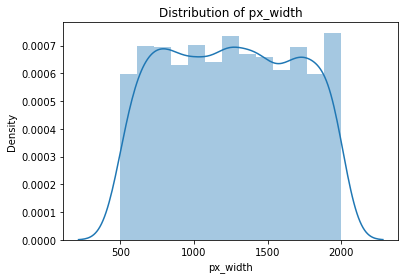

In [173]:
sns.distplot(mobile.px_width)
plt.title('Distribution of px_width')
plt.show()

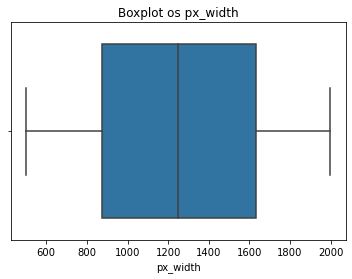

In [174]:
sns.boxplot(mobile.px_width)
plt.title('Boxplot os px_width')
plt.show()

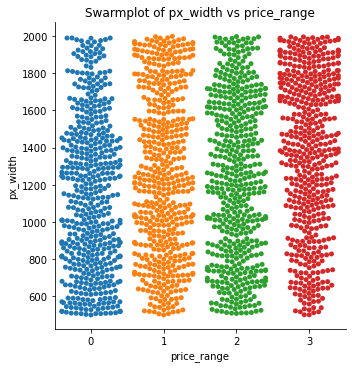

In [175]:
sns.catplot(x='price_range',y='px_width',kind='swarm',data=mobile)
plt.title('Swarmplot of px_width vs price_range')
plt.show()

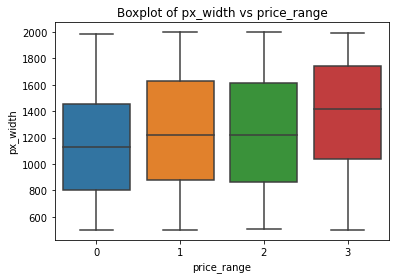

In [176]:
sns.boxplot(x='price_range',y='px_width',data=mobile)
plt.title('Boxplot of px_width vs price_range')
plt.show()

In [178]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_px_width=ols('price_range~px_width',data=mobile).fit()
sm.stats.anova_lm(model_px_width)

,df,sum_sq,mean_sq,F,PR(>F)
px_width,1.0,68.73861,68.738610,56.489089,8.478969e-14
Residual,1998.0,2431.26139,1.216848,NaN,NaN


In [182]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
result=pairwise_tukeyhsd(mobile.px_width,mobile.price_range,alpha=0.05)
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1  101.638  0.001  32.4682 170.8078   True
     0      2   83.776 0.0101  14.6062 152.9458   True
     0      3  219.568  0.001 150.3982 288.7378   True
     1      2  -17.862    0.9 -87.0318  51.3078  False
     1      3   117.93  0.001  48.7602 187.0998   True
     2      3  135.792  0.001  66.6222 204.9618   True
------------------------------------------------------


# px_width p-value 8.47e-14 <0.05 its a good predictor

# 14 ram

In [186]:
mobile.ram.value_counts()

1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64

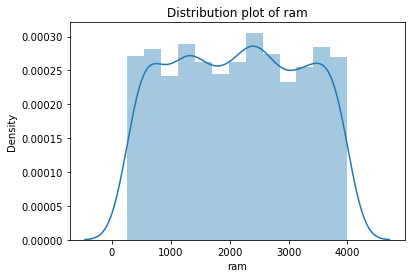

In [187]:
sns.distplot(mobile.ram)
plt.title('Distribution plot of ram')
plt.show()

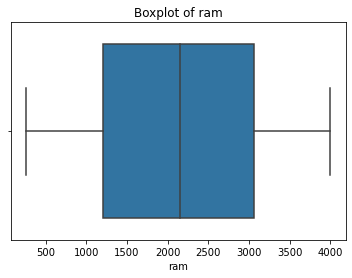

In [188]:
sns.boxplot(mobile.ram)
plt.title('Boxplot of ram')
plt.show()

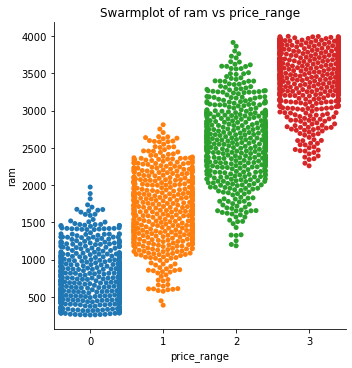

In [189]:
sns.catplot(x='price_range',y='ram',kind='swarm',data=mobile)
plt.title('Swarmplot of ram vs price_range')
plt.show()

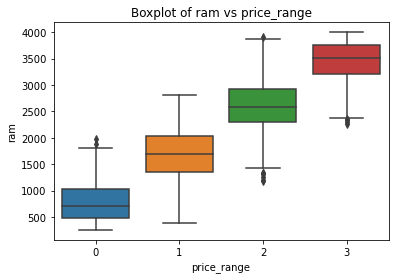

In [191]:
sns.boxplot(x='price_range',y='ram',data=mobile)
plt.title('Boxplot of ram vs price_range')
plt.show()

In [194]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_ram=ols('ram ~price_range ',data=mobile).fit()
sm.stats.anova_lm(model_ram)

,df,sum_sq,mean_sq,F,PR(>F)
price_range,1.0,1.978061e+09,1.978061e+09,10565.894952,0.0
Residual,1998.0,3.740494e+08,1.872119e+05,NaN,NaN


In [195]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
result=pairwise_tukeyhsd(mobile.ram,mobile.price_range,alpha=0.05)
print(result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower     upper   reject
-------------------------------------------------------
     0      1  894.176 0.001  823.7937  964.5583   True
     0      2 1797.502 0.001 1727.1197 1867.8843   True
     0      3 2663.918 0.001 2593.5357 2734.3003   True
     1      2  903.326 0.001  832.9437  973.7083   True
     1      3 1769.742 0.001 1699.3597 1840.1243   True
     2      3  866.416 0.001  796.0337  936.7983   True
-------------------------------------------------------


# ram is a good prdictor

In [196]:
mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# 15 sc_h

In [199]:
mobile.sc_h.value_counts()

17    193
12    157
7     151
16    143
14    143
15    135
13    131
11    126
10    125
9     124
19    124
18    120
8     117
6     114
5      97
Name: sc_h, dtype: int64

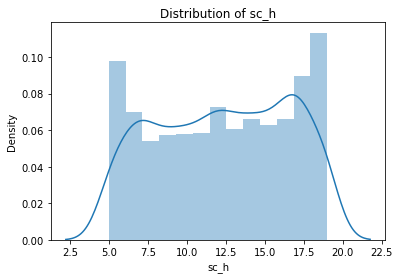

In [200]:
sns.distplot(mobile.sc_h)
plt.title('Distribution of sc_h')
plt.show()

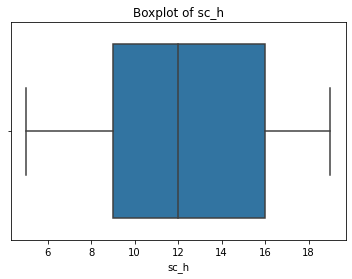

In [201]:
sns.boxplot(mobile.sc_h)
plt.title('Boxplot of sc_h')
plt.show()

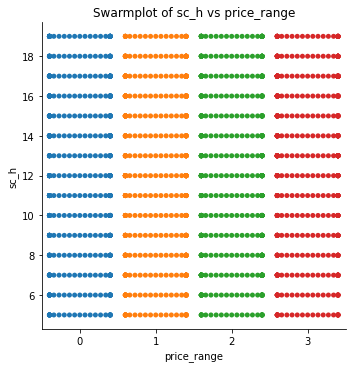

In [202]:
sns.catplot(x='price_range',y='sc_h',kind='swarm',data=mobile)
plt.title('Swarmplot of sc_h vs price_range')
plt.show()

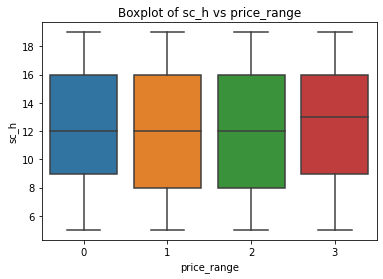

In [203]:
sns.boxplot(x='price_range',y='sc_h',data=mobile)
plt.title('Boxplot of sc_h vs price_range')
plt.show()

In [205]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_sc_h=ols('sc_h ~ price_range',data=mobile).fit()
sm.stats.anova_lm(model_sc_h)

,df,sum_sq,mean_sq,F,PR(>F)
price_range,1.0,18.7489,18.748900,1.05622,0.304203
Residual,1998.0,35466.3666,17.750934,NaN,NaN


In [207]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
result=pairwise_tukeyhsd(mobile.sc_h,mobile.price_range)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   -0.112    0.9 -0.7965 0.5725  False
     0      2   -0.314 0.6232 -0.9985 0.3705  False
     0      3    0.356 0.5347 -0.3285 1.0405  False
     1      2   -0.202 0.8593 -0.8865 0.4825  False
     1      3    0.468 0.2944 -0.2165 1.1525  False
     2      3     0.67 0.0577 -0.0145 1.3545  False
---------------------------------------------------


# sc_h is a bad predictor

# 16 sc_w

In [209]:
mobile.sc_w.value_counts()

1     210
3     199
4     182
0     180
5     161
2     156
7     132
6     130
8     125
10    107
9      97
11     84
12     68
13     49
14     33
15     31
16     29
17     19
18      8
Name: sc_w, dtype: int64

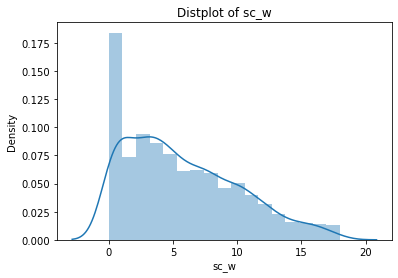

In [210]:
sns.distplot(mobile.sc_w)
plt.title('Distplot of sc_w')
plt.show()

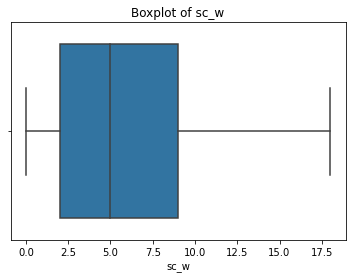

In [211]:
sns.boxplot(mobile.sc_w)
plt.title('Boxplot of sc_w')
plt.show()

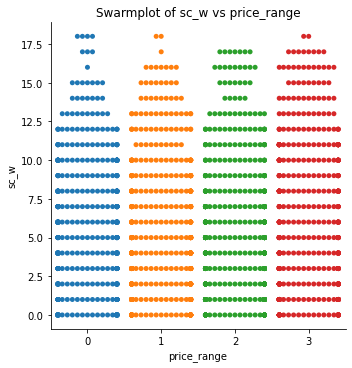

In [212]:
sns.catplot(x='price_range',y='sc_w',kind='swarm',data=mobile)
plt.title('Swarmplot of sc_w vs price_range')
plt.show()

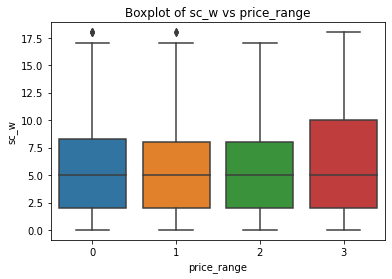

In [213]:
sns.boxplot(x='price_range',y='sc_w',data=mobile)
plt.title('Boxplot of sc_w vs price_range')
plt.show()

In [215]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
model_sc_w=ols('price_range~sc_w',data=mobile).fit()
sm.stats.anova_lm(model_sc_w)

,df,sum_sq,mean_sq,F,PR(>F)
sc_w,1.0,3.746406,3.746406,2.998622,0.08349
Residual,1998.0,2496.253594,1.249376,NaN,NaN


In [216]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
result=pairwise_tukeyhsd(mobile.sc_w,mobile.price_range)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   -0.138    0.9 -0.8461 0.5701  False
     0      2    0.032    0.9 -0.6761 0.7401  False
     0      3    0.446 0.3685 -0.2621 1.1541  False
     1      2     0.17    0.9 -0.5381 0.8781  False
     1      3    0.584 0.1468 -0.1241 1.2921  False
     2      3    0.414 0.4371 -0.2941 1.1221  False
---------------------------------------------------


# sc_w is not a good predictor

# 17 talk_time

In [219]:
mobile.talk_time.value_counts()

7     124
4     123
16    116
15    115
19    113
6     111
10    105
8     104
11    103
20    102
14    101
13    100
18    100
9     100
2      99
12     99
17     98
3      94
5      93
Name: talk_time, dtype: int64

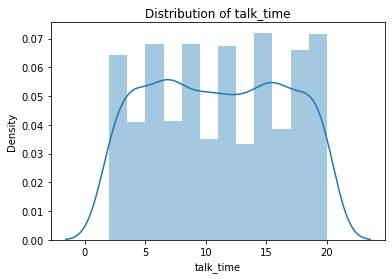

In [220]:
sns.distplot(mobile.talk_time)
plt.title('Distribution of talk_time')
plt.show()

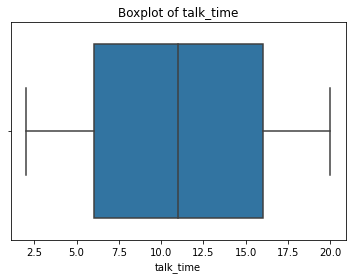

In [221]:
sns.boxplot(mobile.talk_time)
plt.title('Boxplot of talk_time')
plt.show()

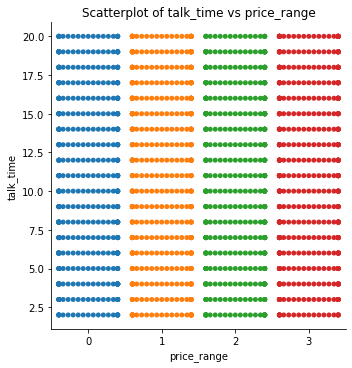

In [223]:
sns.catplot(x='price_range',y='talk_time',kind='swarm',data=mobile)
plt.title('Scatterplot of talk_time vs price_range')
plt.show()

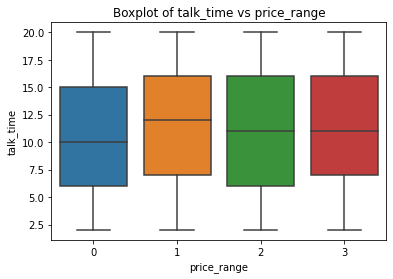

In [224]:
sns.boxplot(x='price_range',y='talk_time',data=mobile)
plt.title('Boxplot of talk_time vs price_range')
plt.show()

In [225]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_talk_time=ols('price_range~ talk_time',data=mobile).fit()
sm.stats.anova_lm(model_talk_time)

,df,sum_sq,mean_sq,F,PR(>F)
talk_time,1.0,1.194526,1.194526,0.955121,0.328537
Residual,1998.0,2498.805474,1.250653,NaN,NaN


In [226]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
result=pairwise_tukeyhsd(mobile.talk_time,mobile.price_range)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1     0.75 0.1315 -0.1381 1.6381  False
     0      2     0.36 0.7002 -0.5281 1.2481  False
     0      3    0.486 0.4952 -0.4021 1.3741  False
     1      2    -0.39 0.6515 -1.2781 0.4981  False
     1      3   -0.264 0.8562 -1.1521 0.6241  False
     2      3    0.126    0.9 -0.7621 1.0141  False
---------------------------------------------------


# talk_time is not a good predictor

# 18 three_g

In [228]:
mobile.three_g.value_counts()

1    1523
0     477
Name: three_g, dtype: int64

<AxesSubplot:xlabel='three_g', ylabel='count'>

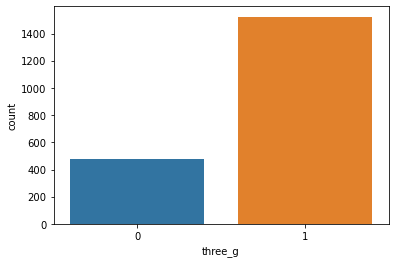

In [230]:
sns.countplot(mobile.three_g)

Text(0.5, 1.0, 'three_g vs price_range')

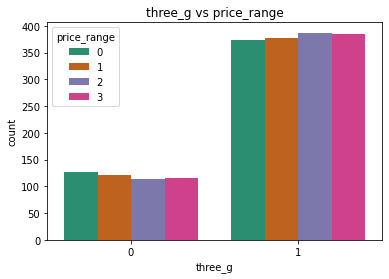

In [231]:
sns.countplot(mobile.three_g,hue=mobile.price_range,palette='Dark2')
plt.title('three_g vs price_range')

In [232]:
from scipy.stats import chi2,chi2_contingency
ct_three_g=pd.crosstab(mobile.three_g,mobile.price_range)
ct_three_g

price_range,0,1,2,3
three_g,,,,
0,127,122,113,115
1,373,378,387,385


In [233]:
chi2_contingency(ct_three_g,correction=False)

(1.3737644035343461,
 0.7116958581372179,
 3,
 array([[119.25, 119.25, 119.25, 119.25],
        [380.75, 380.75, 380.75, 380.75]]))

# three_g is a not a good  predictor

In [234]:
mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# 19 touch_screen

In [236]:
mobile.touch_screen.value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

<AxesSubplot:xlabel='touch_screen', ylabel='count'>

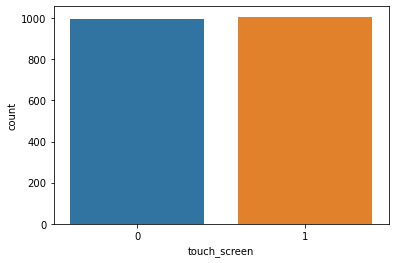

In [237]:
sns.countplot(mobile.touch_screen)

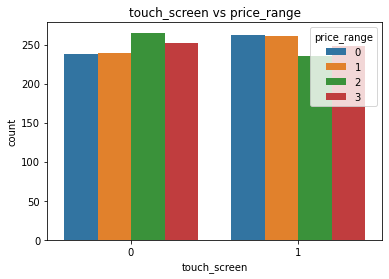

In [238]:
sns.countplot(mobile.touch_screen,hue=mobile.price_range)
plt.title('touch_screen vs price_range')
plt.show()

In [241]:
from scipy.stats import chi2,chi2_contingency

ct_touch_screen=pd.crosstab(mobile.touch_screen,mobile.price_range)
ct_touch_screen

price_range,0,1,2,3
touch_screen,,,,
0,238,239,265,252
1,262,261,235,248


In [242]:
chi2_contingency(ct_touch_screen)

(3.880139685028661,
 0.27470114180281896,
 3,
 array([[248.5, 248.5, 248.5, 248.5],
        [251.5, 251.5, 251.5, 251.5]]))

# touch_screen is not a good predictor

# 20 wifi

In [245]:
mobile.wifi.value_counts()

1    1014
0     986
Name: wifi, dtype: int64

<AxesSubplot:xlabel='wifi', ylabel='count'>

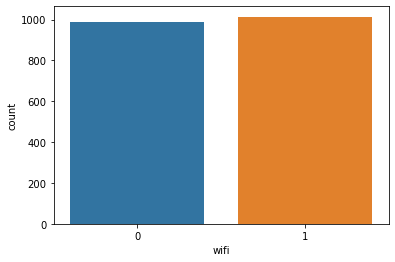

In [246]:
sns.countplot(mobile.wifi)

<AxesSubplot:xlabel='wifi', ylabel='count'>

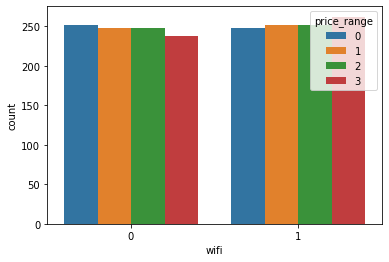

In [247]:
sns.countplot(mobile.wifi,hue=mobile.price_range)

In [248]:
ct_wifi=pd.crosstab(mobile.wifi,mobile.price_range)
ct_wifi

price_range,0,1,2,3
wifi,,,,
0,252,248,248,238
1,248,252,252,262


In [249]:
from scipy.stats import chi2,chi2_contingency

In [250]:
chi2_contingency(ct_wifi)

(0.8561678088905424,
 0.8359905195342198,
 3,
 array([[246.5, 246.5, 246.5, 246.5],
        [253.5, 253.5, 253.5, 253.5]]))

# wifi is not a good predictor

# 

# Good predictors:-

1. battery_power
2. int_memory
3. px_height
4. px_width
5. ram

# Bad predictors:- 

1. blue
2. clock_speed
3. dual_sim
4. fc
5. four_g
6. m_dep
7. mobile_wt
8. n_cores
9. pc
10. sc_h
11. sc_w
12.talk_time
13. three_g
14.touch_screen
15. wifi